In [4]:
import torchvision.transforms as T
import matplotlib.pyplot as plt
from models import VITForReconstruction

model = VITForReconstruction.from_pretrained('../ckpts/VIT')

Model Parameters: 6,616,320
Model Parameters: 6,616,320


In [5]:
image = plt.imread('../assets/beach.png')
transform = T.Compose([T.ToTensor(), T.Resize((336, 336)), T.Normalize([0.5], [0.5])])
image = transform(image).unsqueeze(0)

output = model(image).reconstruction
output = output * 0.5 + 0.5
output = output.squeeze(0).permute(1, 2, 0).detach().numpy()

image = image * 0.5 + 0.5
image = image.squeeze(0).permute(1, 2, 0).detach().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13098747..1.1110739].


Text(0.5, 1.0, 'Reconstructed Image')

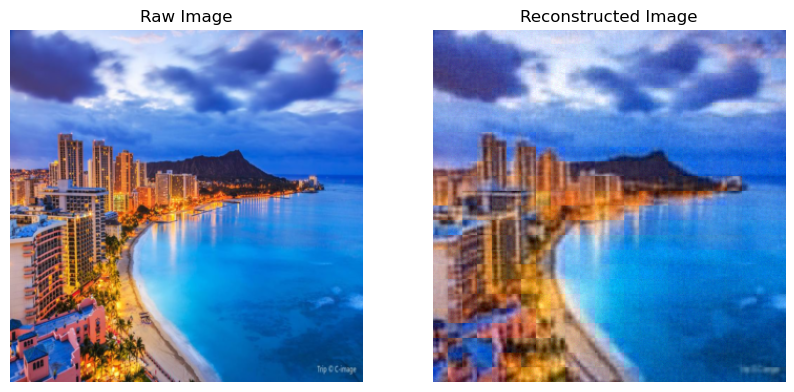

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Raw Image')

axes[1].imshow(output)
axes[1].axis('off')
axes[1].set_title('Reconstructed Image')